### Read Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)



In [44]:
df = pd.read_excel('data\Telco_customer_churn.xlsx')

### Exploration

In [45]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [47]:
#drop some useless column 
df.drop(columns={'Country','State','City','CustomerID','CLTV','Zip Code','Latitude','Longitude','Lat Long','Count'},inplace=True)

In [48]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: Gender - Unique Values: ['Male' 'Female']
Column: Senior Citizen - Unique Values: ['No' 'Yes']
Column: Partner - Unique Values: ['No' 'Yes']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: Tenure Months - Unique Values: [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Column: Phone Service - Unique Values: ['Yes' 'No']
Column: Multiple Lines - Unique Values: ['No' 'Yes' 'No phone service']
Column: Internet Service - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: Online Security - Unique Values: ['Yes' 'No' 'No internet service']
Column: Online Backup - Unique Values: ['Yes' 'No' 'No internet service']
Column: Device Protection - Unique Values: ['No' 'Yes' 'No internet service']
Column: Tech Support - Unique Values: ['No' 'Yes' 'No internet service']
Column: Streaming TV - Unique Values: ['No' '

### Visualise Target Variable Distribution

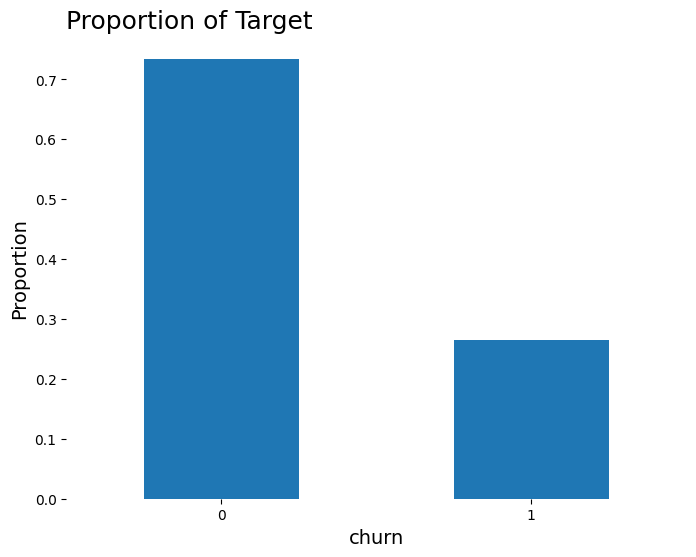

In [59]:
# create a figure
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df['Churn Value'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,)

# set title and labels
ax.set_title('Proportion of Target',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('Proportion',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

# The data is imbalanced 

### Exploring Categorical Variables Impact 

In [98]:
def categorical_impact(variable,target,df):

    # result = df[df[variable]=='Yes'][[variable,target]].value_counts(normalize=True).reset_index()
    result = pd.crosstab(df[variable],df[target]).apply(lambda x: x/x.sum()*100, axis=1)

    return result

for variable in ['Partner','Dependents','Senior Citizen']:
    print(categorical_impact(variable,'Churn Label',df))
# df[df['Churn Value']==1][['Gender','Churn Value']].value_counts(normalize=True).reset_index()

#gender has no effect on churn
#single people are more likely to churn
#people with no dependents are more likely to churn 
#seniors are more likely to churn

Churn Label         No        Yes
Partner                          
No           67.042021  32.957979
Yes          80.335097  19.664903
Churn Label         No        Yes
Dependents                       
No           67.448301  32.551699
Yes          93.484942   6.515058
Churn Label            No        Yes
Senior Citizen                      
No              76.393832  23.606168
Yes             58.318739  41.681261


In [53]:
numeric_df = df[['Tenure Months','Monthly Charges','Total Charges','Churn Value']]
numeric_df.loc[numeric_df['Total Charges']==' ','Total Charges'] = 0
numeric_df['Total Charges'] = numeric_df['Total Charges'].astype(float)
correlation_matrix = numeric_df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_16588\3686601572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Total Charges'] = numeric_df['Total Charges'].astype(float)


In [54]:
correlation_matrix['Churn Value']

Tenure Months     -0.352229
Monthly Charges    0.193356
Total Charges     -0.198324
Churn Value        1.000000
Name: Churn Value, dtype: float64

In [52]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,Churn Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,NaN
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,NaN
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,NaN
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,NaN
